In [4]:
pip install seaborn


     ------------------------------------- 294.9/294.9 kB 40.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: C:\laragon\bin\python\python-3.10\python.exe -m pip install --upgrade pip


In [5]:
# 1. Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\runcodebagus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# 2. Load dataset
df = pd.read_csv("cleaned_split_sentiment.csv")  # pastikan file ini ada di folder kerja
df.head()


,sentimen,tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,-1,aku tak faham betul jenis orang malaysia yang ...


In [10]:

# 3. Preprocessing function
stop_words = set(stopwords.words('indonesian'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = text.split()
    return " ".join([t for t in tokens if t not in stop_words])

df['clean_tweet'] = df['tweet'].apply(clean_text)



In [23]:
# 4. TF-IDF Vectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5)
X = tfidf.fit_transform(df['clean_tweet'])
y = df['sentimen']
y



0       -1
1       -1
2        1
3        1
4       -1
        ..
10801    1
10802    0
10803    1
10804    1
10805    1
Name: sentimen, Length: 10806, dtype: int64

In [24]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:

# 6. Model training
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [26]:

# 7. Prediction and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6063829787234043
Classification Report:
               precision    recall  f1-score   support

          -1       0.59      0.36      0.44       560
           0       0.61      0.87      0.72      1101
           1       0.62      0.31      0.41       501

    accuracy                           0.61      2162
   macro avg       0.61      0.51      0.52      2162
weighted avg       0.61      0.61      0.58      2162



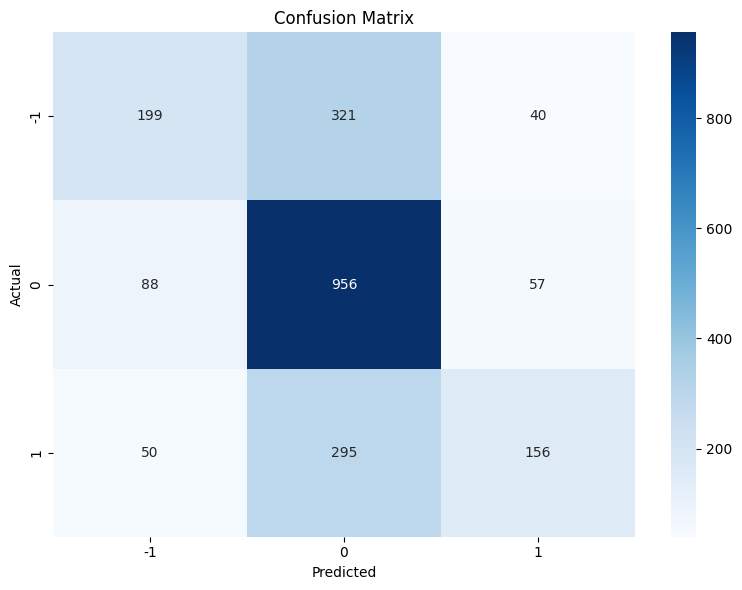

In [27]:

# 8. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[-1,0,1], yticklabels=[-1,0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()


In [ ]:

# 9. Save model and vectorizer
joblib.dump(model, "nb_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


In [ ]:

# 10. Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)